In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
store_data = pd.read_csv('store.csv')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [57]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv') ## Test

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [58]:
data = pd.merge(store_data,train_data,on='Store')
data_test=pd.merge(store_data,test_data,on='Store') #Données tests
data.head(5)
print(data.shape)
print(data_test.shape)

(1017209, 18)
(41088, 17)


In [59]:
def Funct_Date(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    
Funct_Date(data)
Funct_Date(data_test) ##Données tests

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1014567 non-null  float64       
 4   CompetitionOpenSinceMonth  693861 non-null   float64       
 5   CompetitionOpenSinceYear   693861 non-null   float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            509178 non-null   float64       
 8   Promo2SinceYear            509178 non-null   float64       
 9   PromoInterval              509178 non-null   object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [61]:
data.drop(columns=["Promo2SinceWeek", "Promo2SinceYear","PromoInterval"], inplace=True)
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1014567 non-null  float64       
 4   CompetitionOpenSinceMonth  693861 non-null   float64       
 5   CompetitionOpenSinceYear   693861 non-null   float64       
 6   Promo2                     1017209 non-null  int64         
 7   DayOfWeek                  1017209 non-null  int64         
 8   Date                       1017209 non-null  datetime64[ns]
 9   Sales                      1017209 non-null  int64         
 10  Customers                  1017209 non-null  int64         
 11  Open                       1017209 no

In [62]:
data_test.drop(columns=["Promo2SinceWeek", "Promo2SinceYear","PromoInterval"], inplace=True)



In [63]:
#Method for manipulating with missing values

#data['Promo2SinceWeek'] = data['Promo2SinceWeek'].fillna(0)
#data['Promo2SinceYear'] = data['Promo2SinceYear'].fillna(data['Promo2SinceYear'].mode().iloc[0])
#data['PromoInterval'] = data['PromoInterval'].fillna(data['PromoInterval'].mode().iloc[0])

data['CompetitionDistance'] = data['CompetitionDistance'].fillna(data['CompetitionDistance'].mean())
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].fillna(data['CompetitionOpenSinceMonth'].mode().iloc[0])
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].fillna(data['CompetitionOpenSinceYear'].mode().iloc[0])

In [64]:
## Pour les données de test

#data_test['Promo2SinceWeek'] = data_test['Promo2SinceWeek'].fillna(0)
#data_test['Promo2SinceYear'] = data_test['Promo2SinceYear'].fillna(data_test['Promo2SinceYear'].mode().iloc[0])
#data_test['PromoInterval'] = data_test['PromoInterval'].fillna(data_test['PromoInterval'].mode().iloc[0])

data_test['CompetitionDistance'] = data_test['CompetitionDistance'].fillna(data['CompetitionDistance'].mean())
data_test['CompetitionOpenSinceMonth'] = data_test['CompetitionOpenSinceMonth'].fillna(data_test['CompetitionOpenSinceMonth'].mode().iloc[0])
data_test['CompetitionOpenSinceYear'] = data_test['CompetitionOpenSinceYear'].fillna(data_test['CompetitionOpenSinceYear'].mode().iloc[0])
data_test['Open'] = data_test['Open'].fillna(data_test['Open'].mode().iloc[0])

In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   StoreType                  41088 non-null  object        
 2   Assortment                 41088 non-null  object        
 3   CompetitionDistance        41088 non-null  float64       
 4   CompetitionOpenSinceMonth  41088 non-null  float64       
 5   CompetitionOpenSinceYear   41088 non-null  float64       
 6   Promo2                     41088 non-null  int64         
 7   Id                         41088 non-null  int64         
 8   DayOfWeek                  41088 non-null  int64         
 9   Date                       41088 non-null  datetime64[ns]
 10  Open                       41088 non-null  float64       
 11  Promo                      41088 non-null  int64         
 12  Stat

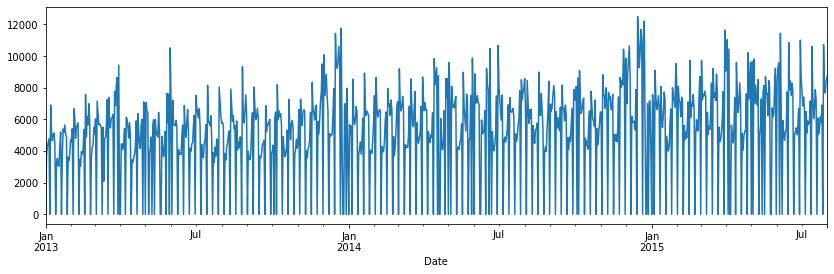

In [33]:
time_sales = data[data['Store'] == 1115]
time_sales.set_index('Date')['Sales'].plot.line(figsize=(14,4));

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

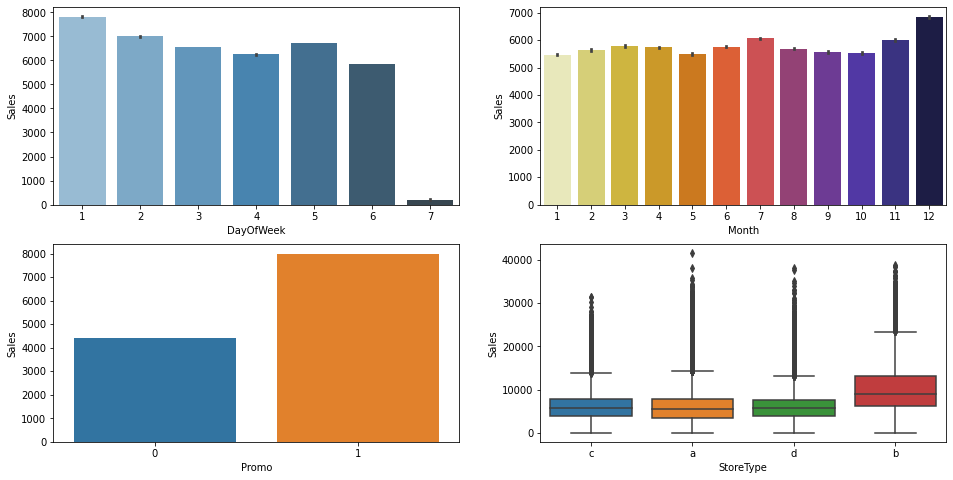

In [34]:
fig, axes = plt.subplots(2,2, sharex=False, figsize=(16,8))
sns.barplot(ax=axes[0,0],x="DayOfWeek", y="Sales", data=data, palette="Blues_d")
sns.barplot(ax=axes[0,1],x="Month", y="Sales", data=data, palette="CMRmap_r")
sns.barplot(ax=axes[1,0],x="Promo", y="Sales", data=data)
sns.boxplot(ax=axes[1,1],x="StoreType", y="Sales", data=data)


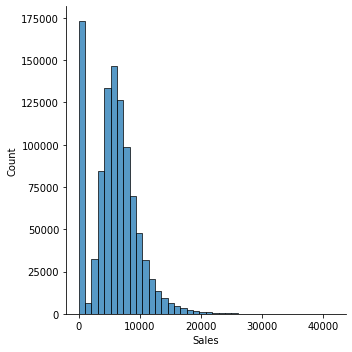

In [15]:
sns.displot(data,x='Sales',bins=40)

In [16]:
#Knowing informations about the different levels of store type and their distribution among sales
data.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


In [18]:
#we can see clearly that StoreType b has highest average of sales
#Let's see the distribution of store type comparing to sales and customers
data.groupby('StoreType')['Customers', 'Sales'].sum()
#we see StoreType a has the best number of sales  comparing to the other stores and in second place Type d

/var/folders/xl/c12psl914wqgnqc3hnc2nctm0000gn/T/ipykernel_1478/1695458705.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


In [66]:
data['Date'] = data['Date'].apply(lambda x: (str(x)[:7]))
data_test['Date'] = data_test['Date'].apply(lambda x: (str(x)[:7])) ##test

In [67]:
data['Date']

0          2015-07
1          2015-07
2          2015-07
3          2015-07
4          2015-07
            ...   
1017204    2013-01
1017205    2013-01
1017206    2013-01
1017207    2013-01
1017208    2013-01
Name: Date, Length: 1017209, dtype: object

[Text(0, 0, '2013-01'),
 Text(1, 0, '2013-02'),
 Text(2, 0, '2013-03'),
 Text(3, 0, '2013-04'),
 Text(4, 0, '2013-05'),
 Text(5, 0, '2013-06'),
 Text(6, 0, '2013-07'),
 Text(7, 0, '2013-08'),
 Text(8, 0, '2013-09'),
 Text(9, 0, '2013-10'),
 Text(10, 0, '2013-11'),
 Text(11, 0, '2013-12'),
 Text(12, 0, '2014-01'),
 Text(13, 0, '2014-02'),
 Text(14, 0, '2014-03'),
 Text(15, 0, '2014-04'),
 Text(16, 0, '2014-05'),
 Text(17, 0, '2014-06'),
 Text(18, 0, '2014-07'),
 Text(19, 0, '2014-08'),
 Text(20, 0, '2014-09'),
 Text(21, 0, '2014-10'),
 Text(22, 0, '2014-11'),
 Text(23, 0, '2014-12'),
 Text(24, 0, '2015-01'),
 Text(25, 0, '2015-02'),
 Text(26, 0, '2015-03'),
 Text(27, 0, '2015-04'),
 Text(28, 0, '2015-05'),
 Text(29, 0, '2015-06'),
 Text(30, 0, '2015-07')]

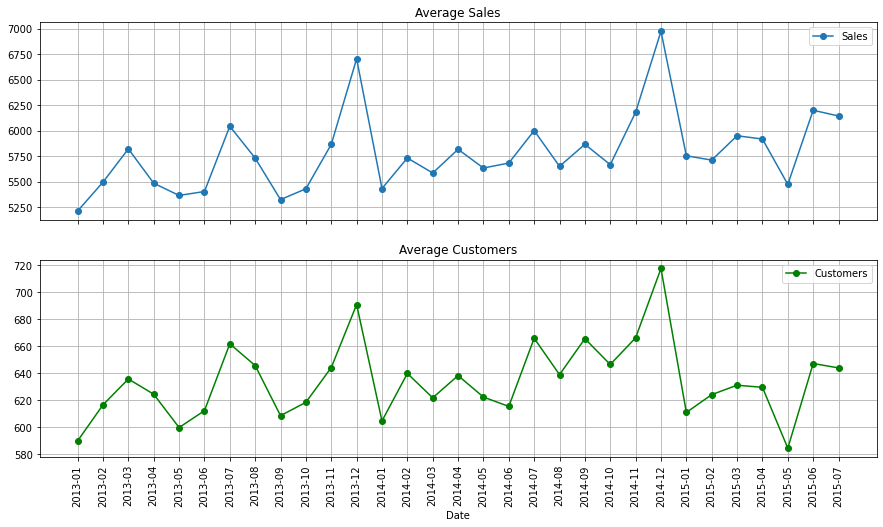

In [14]:
# group by date and get average sales, and customers among months
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8),sharex=True)

average_sales= data.groupby('Date')["Sales"].mean()
average_customers= data.groupby('Date')["Customers"].mean()

# Plot average customers and Sales over the time
# it should be correlated with the average sales over time

ax1 = average_sales.plot(legend=True,marker='o',ax=axis1 ,title="Average Sales",grid=True)
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

ax2 = average_customers.plot(legend=True,marker='o', ax=axis2,title="Average Customers",color='green',grid=True )
ax2.set_xticks(range(len(average_customers)))
ax2.set_xticklabels(average_customers.index.tolist(), rotation=90)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


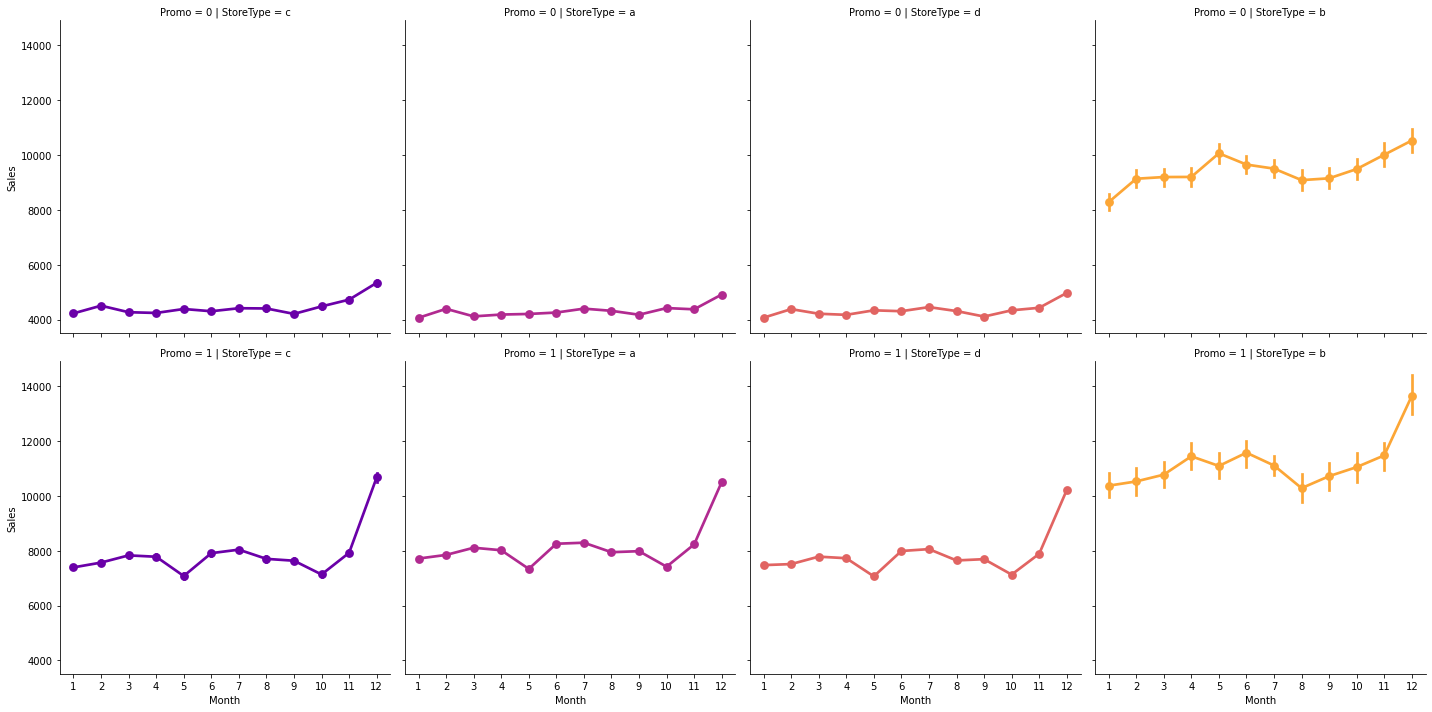

In [15]:
# sales trends
sns.factorplot(data = data, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') # per promo in the store in rows

In [16]:
#We can clearly see that all types of stores have generally the same trend, beside store type b that have more Sales 
#in average per year that we already check it before
#We can see that the sales increase in Promo, and also in holidays like the one in December that 
#knows a big increase of sales
'''
'''

'\n'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


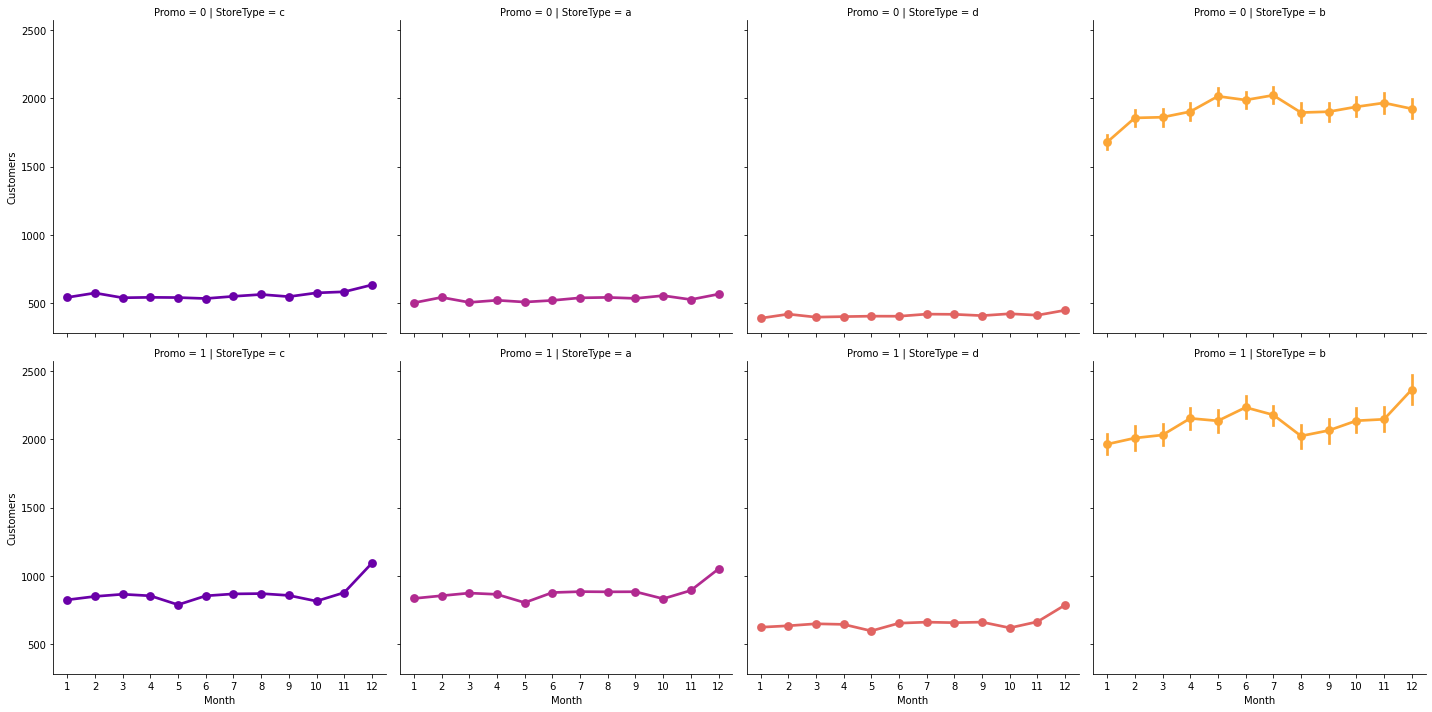

In [17]:
# Customers trends
sns.factorplot(data = data, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') # per promo in the store in rows

In [18]:
#For the customers generally have the same trend that sales besause of the big correlation of those two variables
#If the number of customers increase gonna have an effect in Sales 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


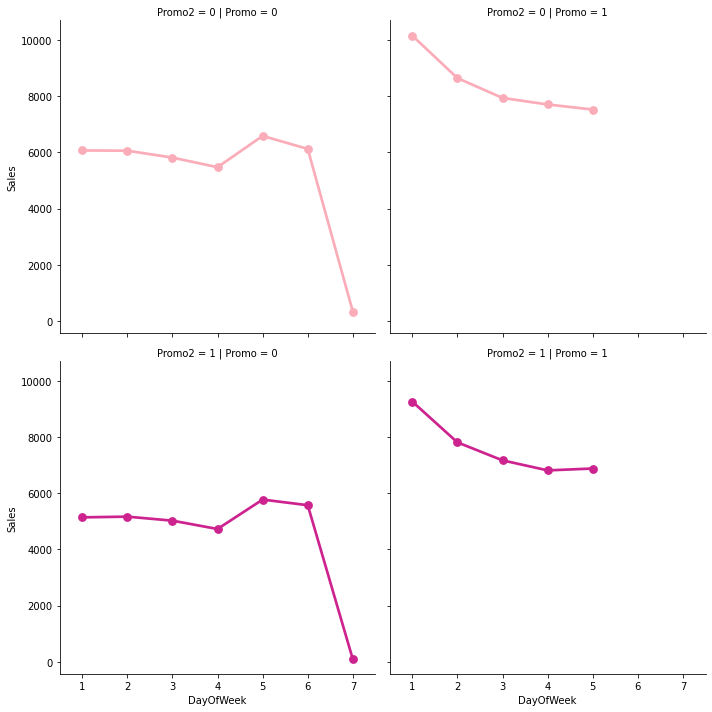

In [19]:
# sale per customer trends
sns.factorplot(data = data, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu') 

In [35]:
#We can analyze that if we don't have no promotion -> promo equal to 0, we find that in Sunday we have
#no Sales and if we have Promo generally the Stores have more Sales in the weekdays and the stores are closed
#in Saturday and Sunday

In [68]:
#Encoding variables
data['StateHoliday'].unique()
data['StateHoliday'] = data['StateHoliday'].map({'0':0, 0:0,'a':1,'b':2,'c':3}).astype(int)
data['StoreType'] = data['StoreType'].map({'c':0, 'a':1,'d':2,'b':3}).astype(int)
data['Assortment'] = data['Assortment'].map({'a':0, 'c':1,'b':2}).astype(int)
#data['PromoInterval'] = data['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2}).astype(int)


In [69]:
### Encoding test 
data_test['StateHoliday'].unique()
data_test['StateHoliday'] = data_test['StateHoliday'].map({'0':0, 0:0,'a':1,'b':2,'c':3}).astype(int)
data_test['StoreType'] = data_test['StoreType'].map({'c':0, 'a':1,'d':2,'b':3}).astype(int)
data_test['Assortment'] = data_test['Assortment'].map({'a':0, 'c':1,'b':2}).astype(int)
#data_test['PromoInterval'] = data_test['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2}).astype(int)



In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   DayOfWeek                  1017209 non-null  int64  
 8   Date                       1017209 non-null  object 
 9   Sales                      1017209 non-null  int64  
 10  Customers                  1017209 non-null  int64  
 11  Open                       1017209 non-null  int64  
 12  Promo                      1017209 non-null  int64  
 13  StateHoliday

In [71]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   StoreType                  41088 non-null  int64  
 2   Assortment                 41088 non-null  int64  
 3   CompetitionDistance        41088 non-null  float64
 4   CompetitionOpenSinceMonth  41088 non-null  float64
 5   CompetitionOpenSinceYear   41088 non-null  float64
 6   Promo2                     41088 non-null  int64  
 7   Id                         41088 non-null  int64  
 8   DayOfWeek                  41088 non-null  int64  
 9   Date                       41088 non-null  object 
 10  Open                       41088 non-null  float64
 11  Promo                      41088 non-null  int64  
 12  StateHoliday               41088 non-null  int64  
 13  SchoolHoliday              41088 non-null  int

In [72]:
data.shape

(1017209, 18)

In [24]:
data_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,0,0,1270.0,9.0,2008.0,0,0.0,2013.0,0,1,4,2015-09,1.0,1,0,0,2015,9,17
1,1,0,0,1270.0,9.0,2008.0,0,0.0,2013.0,0,857,3,2015-09,1.0,1,0,0,2015,9,16
2,1,0,0,1270.0,9.0,2008.0,0,0.0,2013.0,0,1713,2,2015-09,1.0,1,0,0,2015,9,15
3,1,0,0,1270.0,9.0,2008.0,0,0.0,2013.0,0,2569,1,2015-09,1.0,1,0,0,2015,9,14
4,1,0,0,1270.0,9.0,2008.0,0,0.0,2013.0,0,3425,7,2015-09,0.0,0,0,0,2015,9,13


<AxesSubplot:>

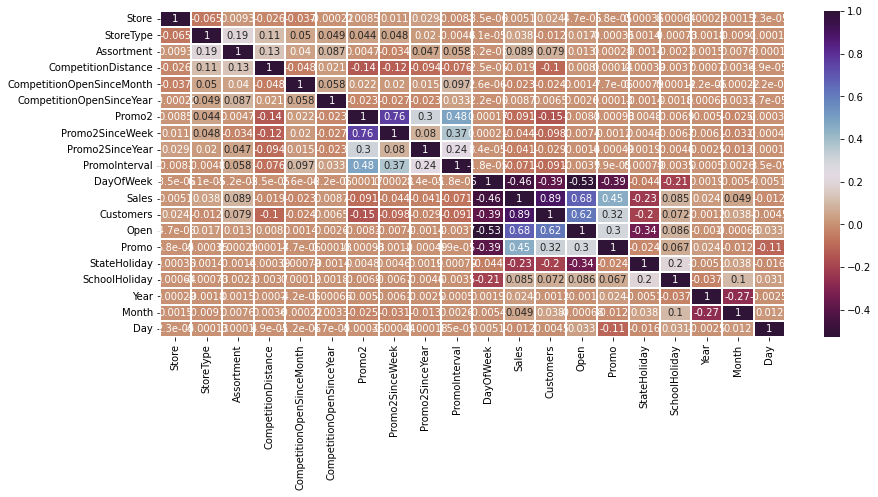

In [24]:
# Heat Map
correlation = data.corr()
plt.figure(figsize=(14,6))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='twilight_shifted_r')

## Modélisation

In [73]:
#Fonction pour calculer RSMPE
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def RMSPE(y_predict, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y_predict - y)**2 ))
    return rmspe 

In [74]:
#Fonction pour faire l'apprentissage des modèles ainsi donner les performances de chaque modèle
def train_and_predict(name, algorithm, train_data, test_data):
    
    from sklearn.metrics import r2_score, mean_squared_error

    algorithm.fit(train_data['x'], train_data['y'])
    print(name, " model")
    y_pred= algorithm.predict(test_data['x'])
    y_pred = np.array(list(map(lambda x: 0 if x < 0 else x, y_pred)))
    rsmpe = RMSPE(y_pred, test_data['y'])
    
    print('MSE score :  %.4f' % mean_squared_error(y_pred,test_data['y']))
    print("RMSPE : ", rsmpe)
    print("Model score : ",algorithm.score(test_data['x'], test_data['y']))
    print('R2 score : %.4f' % r2_score(y_pred,test_data['y']))

    pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':test_data['y']}).reset_index(drop=True)
    print(pred_df.head())
    print('-'*100)
    return rsmpe

In [5]:
#Spliting the data into train and test 
from sklearn.model_selection import train_test_split
import numpy as np
X = data.drop(['Sales','Date','Customers'],axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1)
data_test=data_test.drop(['Date'],axis=1)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   DayOfWeek                  1017209 non-null  int64  
 8   Open                       1017209 non-null  int64  
 9   Promo                      1017209 non-null  int64  
 10  StateHoliday               1017209 non-null  int64  
 11  SchoolHoliday              1017209 non-null  int64  
 12  Year                       1017209 non-null  int64  
 13  Month       

In [44]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   StoreType                  41088 non-null  int64  
 2   Assortment                 41088 non-null  int64  
 3   CompetitionDistance        41088 non-null  float64
 4   CompetitionOpenSinceMonth  41088 non-null  float64
 5   CompetitionOpenSinceYear   41088 non-null  float64
 6   Promo2                     41088 non-null  int64  
 7   Id                         41088 non-null  int64  
 8   DayOfWeek                  41088 non-null  int64  
 9   Open                       41088 non-null  float64
 10  Promo                      41088 non-null  int64  
 11  StateHoliday               41088 non-null  int64  
 12  SchoolHoliday              41088 non-null  int64  
 13  Year                       41088 non-null  int

In [82]:

data_test.set_index('Id', inplace = True)

In [46]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 1 to 41088
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   StoreType                  41088 non-null  int64  
 2   Assortment                 41088 non-null  int64  
 3   CompetitionDistance        41088 non-null  float64
 4   CompetitionOpenSinceMonth  41088 non-null  float64
 5   CompetitionOpenSinceYear   41088 non-null  float64
 6   Promo2                     41088 non-null  int64  
 7   DayOfWeek                  41088 non-null  int64  
 8   Open                       41088 non-null  float64
 9   Promo                      41088 non-null  int64  
 10  StateHoliday               41088 non-null  int64  
 11  SchoolHoliday              41088 non-null  int64  
 12  Year                       41088 non-null  int64  
 13  Month                      41088 non-null  int

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1)

In [78]:
#Modelisation with Linear regression method
from sklearn.linear_model import LinearRegression
model_Linear = LinearRegression().fit(X_train, y_train)

#Modelisation with Decision tree regressor method
from sklearn.tree import DecisionTreeRegressor
model_decis_tree = DecisionTreeRegressor(max_depth=11)

#Modelisation with Random forest regressor method
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_jobs=-1, random_state=42)



In [79]:
models = {
    "LinearRegression": model_Linear,
    "DecisionTreeRegression": model_decis_tree,
    "RandomForestRegression": model_random_forest
}

In [80]:
models_rsmpe = {}
for model in models:
    models_rsmpe[model] = train_and_predict(model, models[model], {'x': X_train, 'y': y_train}, {'x': X_test, 'y':y_test})

LinearRegression  model
MSE score :  6586145.5376
RMSPE :  0.4563842942870771
Model score :  0.5540395253129963
R2 score : 0.1362
   Predictions  Actual
0  6818.337378    6610
1  8348.729662    8634
2  6126.955121   10509
3  5681.775637    3763
4  7227.770701    8956
----------------------------------------------------------------------------------------------------
DecisionTreeRegression  model
MSE score :  4254869.6645
RMSPE :  0.3890654598046343
Model score :  0.7134376877590618
R2 score : 0.6009
   Predictions  Actual
0  5295.060870    6610
1  7071.928070    8634
2  5747.169266   10509
3  5119.344000    3763
4  8710.200387    8956
----------------------------------------------------------------------------------------------------
RandomForestRegression  model
MSE score :  766419.4735
RMSPE :  0.14197621148193124
Model score :  0.9483822175999109
R2 score : 0.9454
   Predictions  Actual
0      6206.13    6610
1      8513.92    8634
2     10673.82   10509
3      4224.71    3763
4    

### We gonna test if Lasso/ ridge/ Elasticnet regression model gonna improve the result of our Linear regression model

In [4]:
# Lasso regression
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

# best alpha parameter
alpha = lasso_cv.alpha_

# Final model
model_lasso = Lasso(alpha = lasso_cv.alpha_)

In [2]:
#Ridge regression
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

#best alpha parameter
alpha = ridge_cv.alpha_

#Final model
model_Ridge = Ridge(alpha = ridge_cv.alpha_)

In [3]:
#Elastic net regression
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_net_cv.fit(X_train, y_train)

#best alpha parameter
alpha = elastic_net_cv.alpha_

#Final model
model_Elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)


In [69]:
#we gonna add to our models the lasso, Ridge and Elastic net
models = {
    "LinearRegression": model_Linear,
#     "DecisionTreeRegression": model_decis_tree, on a déja les résultats dans le tableau d'avant
    "LassoRegression": model_lasso,
    "RidgeRegression":model_Ridge,
    "ElasticNetRegression":model_Elastic_net
#      "RandomForestRegression": model_random_forest , on a déja les résultats dans le tableau d'avant
}

In [70]:
models_rsmpe = {}
for model in models:
    models_rsmpe[model] = train_and_predict(model, models[model], {'x': X_train, 'y': y_train}, {'x': X_test, 'y':y_test})

LinearRegression  model
MSE score :  6532659.6640
RMSPE :  0.4519680799392239
Model score :  0.557252655775033
R2 score : 0.1448
   Predictions  Actual
0  6731.011829    6610
1  8826.139706    8634
2  6089.350384   10509
3  6030.405183    3763
4  7553.940734    8956
----------------------------------------------------------------------------------------------------
LassoRegression  model
MSE score :  6532663.3269
RMSPE :  0.4519681513959657
Model score :  0.5572526453308906
R2 score : 0.1448
   Predictions  Actual
0  6731.011481    6610
1  8826.117065    8634
2  6089.361176   10509
3  6030.418029    3763
4  7553.924606    8956
----------------------------------------------------------------------------------------------------
RidgeRegression  model
MSE score :  6532659.8691
RMSPE :  0.4519680146406144
Model score :  0.5572526557187987
R2 score : 0.1448
   Predictions  Actual
0  6731.012679    6610
1  8826.139526    8634
2  6089.350740   10509
3  6030.405507    3763
4  7553.939247    89

We can clearly see that Ridge Lasso has not improve the performance of the Linear model so we must go to another approach to be continued...

### Le modèle le plus performant c'est celui de RandomForestRegression il nous donne le meilleur score donc on va valider et continuer avec ce modèle la

On va tester sur notre base de donnée du test qui est merge de test data set and store data set je suis entrain de la faire maintenant

In [37]:
test = pd.read_csv('test.csv')
store_data = pd.read_csv('store.csv')

In [38]:
test.fillna(1,inplace=True)
store_data['CompetitionDistance'] = store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean())
store_data['PromoInterval'] = store_data['PromoInterval'].fillna(data['PromoInterval'].mode().iloc[0])
store_data.fillna(0,inplace=True)

Funct_Date(test)
test.drop(["Date"],axis=1,inplace=True)
test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,1,4,1.0,1,0,0,2015,9,17
1,2,3,4,1.0,1,0,0,2015,9,17
2,3,7,4,1.0,1,0,0,2015,9,17
3,4,8,4,1.0,1,0,0,2015,9,17
4,5,9,4,1.0,1,0,0,2015,9,17


In [39]:
mappings = {'0':0, 'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3}
store_data.PromoInterval.replace(mappings, inplace=True)
store_data['PromoInterval'] = store_data['PromoInterval'].astype(int)



In [40]:
test = pd.merge(test,store_data,on='Store')
test.reset_index(drop=True, inplace=True)
test.set_index('Id', inplace=True)
test.reset_index()

test['StoreType'] = test['StoreType'].map({'c':0, 'a':1,'d':2,'b':3}).astype(int)
test['Assortment'] = test['Assortment'].map({'a':0, 'c':1,'b':2}).astype(int)
test['StateHoliday'] = test['StateHoliday'].map({'0':0, 0:0,'a':1,'b':2,'c':3}).astype(int)

test.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,,,
1,1,4,1.0,1,0,0,2015,9,17,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0
857,1,3,1.0,1,0,0,2015,9,16,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1713,1,2,1.0,1,0,0,2015,9,15,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0
2569,1,1,1.0,1,0,0,2015,9,14,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0
3425,1,7,0.0,0,0,0,2015,9,13,0,0,1270.0,9.0,2008.0,0,0.0,0.0,0


In [41]:
test.info()
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 1 to 41088
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   DayOfWeek                  41088 non-null  int64  
 2   Open                       41088 non-null  float64
 3   Promo                      41088 non-null  int64  
 4   StateHoliday               41088 non-null  int64  
 5   SchoolHoliday              41088 non-null  int64  
 6   Year                       41088 non-null  int64  
 7   Month                      41088 non-null  int64  
 8   Day                        41088 non-null  int64  
 9   StoreType                  41088 non-null  int64  
 10  Assortment                 41088 non-null  int64  
 11  CompetitionDistance        41088 non-null  float64
 12  CompetitionOpenSinceMonth  41088 non-null  float64
 13  CompetitionOpenSinceYear   41088 non-null  flo

In [1]:
model_random_forest.fit(X_train,y_train)
test['Sales'] = model_random_forest.predict(test)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   PromoInterval              1017209 non-null  int64  
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [83]:
model_random_forest.predict(data_test)

array([4352.41, 4611.9 , 4813.34, ..., 9752.65,    0.  , 8146.38])

In [84]:
data_test['Sales'] = model_random_forest.predict(data_test)

In [85]:
submission = data_test['Sales']
submission = submission.reset_index()
submission.head()

,Id,Sales
0,1,4352.41
1,857,4611.90
2,1713,4813.34
3,2569,5232.99
4,3425,0.00


In [86]:
submission.to_csv("pizza4fromages.csv", sep=',', index=False)
